# Modelos de Regresión Lineal

## Objetivos:

Aplicar técnicas de regresión lineal para analizar relaciones entre variables, utilizando Python como herramienta de apoyo.

*Nota: Este laboratorio está diseñado para desarrollar razonamiento estadístico. Evita el uso de herramientas de IA para responder las preguntas a menos que esto sea explícitamente sugerido* 🤖. *En su lugar, enfócate en aplicar los conceptos revisados.*

## Actividad 1

Trabajas como analista de datos en el equipo de marketing digital de una tienda online del Reino Unido especializada en productos electrónicos y artículos de lujo. En el contexto de esta empresa, las ventas dependen de la cantidad de visitas que recibe el sitio web. El gerente de ventas está evaluando si conviene aumentar la inversión en campañas publicitarias para atraer más usuarios. Para ello, te entrega una base de datos con el número de visitas diarias al sitio y las ventas totales por día (en libras esterlinas). El gerente te solicita que analices la relación entre ambas variables y proporciones evidencia, basada en los datos disponibles, que respalde esta dependencia.

Para esto puedes descargar la base de datos **<a href="https://docs.google.com/spreadsheets/d/1bmYIXcn3SPyrJHi6IWzvj2t_fSkn6pyj/export?format=xlsx">aquí</a>** y responder las siguientes preguntas:

1. Muestra las tres primeras filas de la base de datos.

In [ ]:
import pandas as pd
base_datos = pd.read_excel('Base6_1.xlsx')

base_datos.head(3)

,fecha,visitas_diarias,ventas_diarias
0,2010-12-01,121,46376.49
1,2010-12-02,137,47316.53
2,2010-12-03,57,23921.71


2. Calcula la covarianza y el coeficiente de correlación lineal entre las visitas diarias y las ventas diarias utilizando los datos disponibles. ¿Qué indican estos resultados en cuanto a la relación entre las visitas al sitio web y las ventas?

In [ ]:
v_indep=base_datos["visitas_diarias"]
v_dep=base_datos["ventas_diarias"]
covar = v_dep.cov(v_indep)

#Cálculo de Coeficiente de correlación lineal de Pearson
correl =v_dep.corr(v_indep)

print(f'Covarianza: {covar:.1f}\nCorrelación lineal de Pearson: {correl:.2f}')

Covarianza: 265561.8
Correlación lineal de Pearson: 0.60


**Respuesta:**

Como la covarianza es positiva, existe una relación directa entre las visitas diarias y las ventas diarias

Como el coef. de correlación es cercano a 1 (0,6) existe una relación lineal creciente entre las variables.

3. Encuentra el modelo de regresión lineal asociado a los datos e interpreta la pendiente.

In [ ]:
import numpy as np
modelo = np.polyfit(v_indep, v_dep, 1)
pendiente, intercepto= modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo es: y={pendiente:.2f}x+{intercepto:.2f}')

Pendiente: 431.86
Intercepto: 2971.69
El modelo es: y=431.86x+2971.69


**Nota:**

La interpretación de la pendiente sería algo así:
" Las ventas diarias aumentan en 431,86 libras esterlinas por cada visita diaria

Mientras que, la interpretación del intercepto:
"Si no hay visitas diarias, las ventas diarias son de 2971,69 libras esterlinas

4. Genera un gráfico de dispersión que relacione las visitas diarias con las ventas diarias. Incorpora la línea de tendencia (regresión lineal) e incluye el modelo lineal en el gráfico. Luego, describe lo que observas.

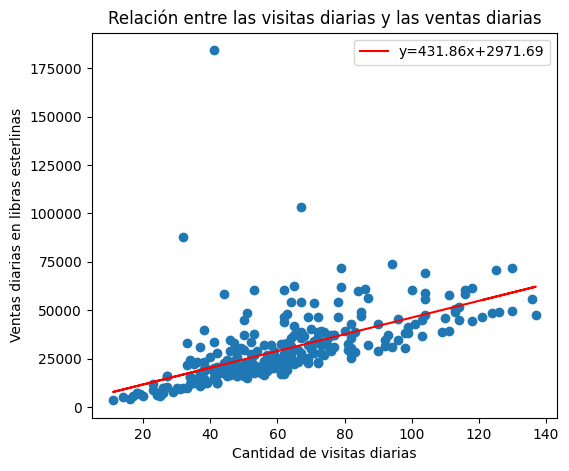

In [ ]:
#Gráfico de dispersión
import matplotlib.pyplot as plt

#Creamos el gráfico de dispersión
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep, v_dep)

# Línea de tendencia
ax.plot(v_indep, pendiente * v_indep + intercepto, color='red',
        label= f'y={pendiente:.2f}x+{intercepto:.2f}')

#Personalización
ax.set_title('Relación entre las visitas diarias y las ventas diarias')
ax.set_xlabel('Cantidad de visitas diarias')
ax.set_ylabel('Ventas diarias en libras esterlinas')

ax.legend()
plt.show()

5. Al observar la distancia de los puntos con la línea de tendencia ¿qué observas sobre la dispersión de los puntos respecto a la línea de tendencia?

**Respuesta:** La mayoría de los puntos están cerca del modelo de regresión

6. Usando el modelo de regresión lineal determinado, estima las ventas que se generarían si el sitio recibiera 350 visitas en un día.

In [ ]:
431.86*350+2971.69

154122.69

**Respuesta:** Si el sitio recibiera 350 visitas, se **estima** que las ventas diarias serán de 154122,69 libras esterlinas

7. Calcula el coeficiente de determinación $R^{2}$ e interpreta su valor.

In [ ]:
#Coeficiente de determinación
from sklearn.metrics import r2_score

predicciones= np.polyval(modelo, v_indep)

#Calculamos en coeficiente de determinación
r2= r2_score(v_dep, predicciones)

print(f'Coeficiente de determinación: {r2 * 100:.1f}%')

Coeficiente de determinación: 36.0%


**Respuesta:** El 36% de la variabilidad de las ventas diarias se explica por el modelo a partir de las visitas diarias

## Actividad 2

Un grupo de docentes tiene como objetivo analizar si existe una relación entre tiempo de estudio semanal (en horas) y el rendimiento académico de los estudiantes en la nota obtenida en una evaluación (en puntos). Para ello, se recopiló información de 200 estudiantes pertenecientes a carreras del área informática de un instituto profesional.

Descarga la base de datos **<a href="https://drive.google.com/uc?export=download&id=1ATKPCSFq2xcGzEUme2jEHKsSYcaf75LO
">aquí</a>** y responde las siguientes preguntas:

1. Explora la base de datos y muestra las primeras 5 filas del DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_datos= pd.read_csv('Base6_2.csv')

base_datos.head(5)

,horas_estudio,nota
0,6,2.1
1,19,3.7
2,28,6.0
3,14,3.7
4,10,3.4


2. ¿Cuál es la variable dependiente y cuál la independiente en el análisis que los docentes planean desarrollar?

**Respuesta:**

VI: Horas de estudio

VD: Nota

3. Calcula la covarianza y el coeficiente de correlación lineal de Pearson. Considerando estos valores, comenta cómo es la relación entre las variables.

In [ ]:
#Cálculo de Covarianza
v_indep=base_datos["horas_estudio"]
v_dep=base_datos["nota"]
covar = v_dep.cov(v_indep)

#Cálculo de Coeficiente de correlación lineal de Pearson
correl =v_dep.corr(v_indep)

print(f'Covarianza: {covar:.1f}\nCorrelación lineal de Pearson: {correl:.2f}')

Covarianza: 15.7
Correlación lineal de Pearson: 0.97


**Interpretaciones:**

Covarianza: Como la covarianza es positiva, existe una relación directa entre las horas de estudio y la nota.

Coef. de correlación: Como el coef. de correlación es cercano a 1, existe una relación fuerte directa entre las horas de estudio y la nota.

4. Determina el modelo de regresión lineal correspondiente a los datos e interpreta el valor de la pendiente.

In [ ]:

modelo = np.polyfit(v_indep, v_dep, 1)
pendiente, intercepto= modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo es: y={pendiente:.2f}x+{intercepto:.2f}')

Pendiente: 0.18
Intercepto: 1.02
El modelo es: y=0.18x+1.02


**Interpretación:** La nota aumenta en 0,18 puntos por cada hora de estudio

5. Genera un gráfico de dispersión que represente la relación entre las variables. Incorpora la línea de tendencia (regresión lineal) e incluye el modelo lineal en el gráfico. Luego, comenta lo observado.

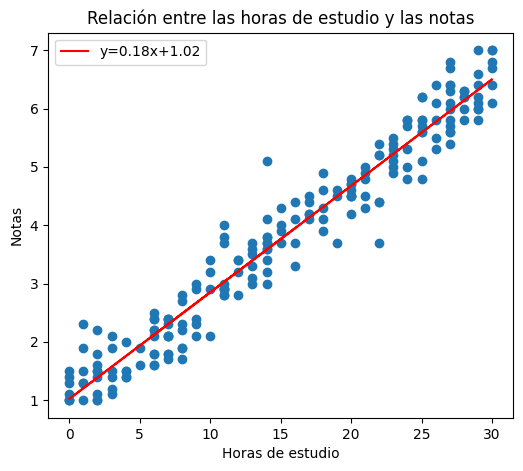

In [ ]:
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep, v_dep)

# Línea de tendencia
ax.plot(v_indep, pendiente * v_indep + intercepto, color='red',
        label= f'y={pendiente:.2f}x+{intercepto:.2f}')

#Personalización
ax.set_title('Relación entre las horas de estudio y las notas')
ax.set_xlabel('Horas de estudio')
ax.set_ylabel('Notas')

ax.legend()
plt.show()

**Comentario:** Lo que nos adelantó la covarianza y el coef. de correlación, las notas aumentan a medida que aumenta las horas de estudio de forma similar a una función lineal

6. Observando el gráfico, estime la nota de un estudiante que dedica 20 horas semanales al estudio y de otro que estudia solo 3 horas. Compare posteriormente estos valores con las estimaciones generadas por el modelo lineal determinado.

In [ ]:
#y=0.18x+1.02
print(f'Si el estudiante estudia 20 horas entonces se estima que su nota será {0.18*20+1.02:.1f} aprox')
print(f'Si el estudiante estudia 3 horas entonces se estima que su nota será {0.18*3+1.02:.1f} aprox')

Si el estudiante estudia 20 horas entonces se estima que su nota será 4.6 aprox
Si el estudiante estudia 3 horas entonces se estima que su nota será 1.6 aprox


7. ¿Es útil este modelo para predecir? Justifica utilizando el coeficiente de determinación ($R^{2}$).

In [ ]:
from sklearn.metrics import r2_score

predicciones= np.polyval(modelo, v_indep)

#Calculamos en coeficiente de determinación
r2= r2_score(v_dep, predicciones)

print(f'Coeficiente de determinación: {r2 * 100:.1f}%')

Coeficiente de determinación: 94.9%


**Respuesta:** Podemos confiar pues el coef. de determinación es cercano al 100%.

El 94,9% de la variabilidad de las notas se explica por el modelo a partir del tiempo de estudio

## Actividad 3

Una empresa de servicios técnicos desea analizar la relación entre el número de trabajadores asignados a un proyecto y el tiempo total (en horas) que toma completarlo. Para ello, ha recopilado información de 150 proyectos técnicos de mediana envergadura, como instalaciones de redes, montajes de hardware y configuraciones masivas.

Descargar la base de datos **<a href="https://docs.google.com/spreadsheets/d/1HQgGNDwDGoDqCU5YECgwNh724iLgUORz/export?format=xlsx">aquí</a>** y responde las siguientes preguntas:

1. Muestra las primeras cinco filas de la base de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_datos= pd.read_excel('Base6_3.xlsx')

base_datos.head(5)

,trabajadores,tiempo_total
0,20,24.7
1,14,45.9
2,5,65.0
3,14,49.0
4,2,71.9


2. ¿Qué representa cada fila de la base de datos?

**Respuesta:** Cada fila indica la cantidad de trabajadores asignados a un proyecto y el tiempo en horas que tardaron en completarlo

3. Al analizar la relación entre la cantidad de trabajadores y el tiempo total del proyecto, ¿cuál es la variable dependiente? ¿Y la independiente?

**Respuesta:**

VI: Cantidad de trabajadores

VD: Tiempo total en horas

4. Calcula la covarianza y el coeficiente de correlación lineal de Pearson entre las variables e interpreta los resultados.

In [ ]:
#Cálculo de Covarianza
v_indep=base_datos["trabajadores"]
v_dep=base_datos["tiempo_total"]
covar = v_dep.cov(v_indep)

#Cálculo de Coeficiente de correlación lineal de Pearson
correl =v_dep.corr(v_indep)

print(f'Covarianza: {covar:.1f}\nCorrelación lineal de Pearson: {correl:.2f}')

Covarianza: -65.8
Correlación lineal de Pearson: -0.93


**Interpretación:**

Covarianza: Como la covarianza es negativa, existe una relación inversa entre la cantidad de trabajadores y el tiempo total.

Coef. de correlación: Como el coef. de correlación es cercano a -1, existe una relación lineal fuerte decreciente entre la cantidad de trabajadores y el tiempo total

5. Determina el modelo de regresión lineal y luego interpreta el valor de la pendiente.

In [ ]:
modelo = np.polyfit(v_indep, v_dep, 1)
pendiente, intercepto= modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo es: y={pendiente:.2f}x+{intercepto:.2f}')

Pendiente: -2.59
Intercepto: 81.64
El modelo es: y=-2.59x+81.64


**Interpretación:** El tiempo total disminuye 2,59 hrs por cada trabajador asignado

6. Genera un gráfico de dispersión que represente la relación entre las variables. Incorpora la línea de tendencia (regresión lineal) e incluye el modelo lineal en el gráfico. Comenta lo observado.

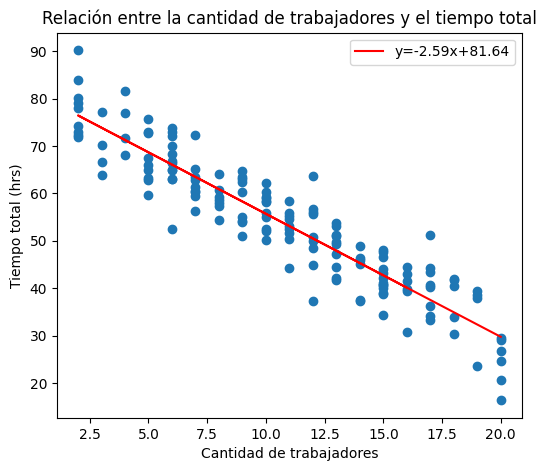

In [ ]:
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep, v_dep)

# Línea de tendencia
ax.plot(v_indep, pendiente * v_indep + intercepto, color='red',
        label= f'y={pendiente:.2f}x+{intercepto:.2f}')

#Personalización
ax.set_title('Relación entre la cantidad de trabajadores y el tiempo total')
ax.set_xlabel('Cantidad de trabajadores')
ax.set_ylabel('Tiempo total (hrs)')

ax.legend()
plt.show()

**Comentario:** El tiempo total que tardan en completar el proyecto disminuye a medida que la cantida de trabajadores aumenta

7. Utiliza el modelo para estimar la duración de un proyecto que cuente con:
* 10 trabajadores.
* 15 trabajadores.
* 18 trabajadores.

In [ ]:
#y=-2.59x+81.64
print(f' Si el proyecto tiene 10 trabajadores, se estima que el tiempo total será de {-2.59*10+81.64:.1f} hrs')
print(f' Si el proyecto tiene 15 trabajadores, se estima que el tiempo total será de {-2.59*15+81.64:.1f} hrs')
print(f' Si el proyecto tiene 18 trabajadores, se estima que el tiempo total será de {-2.59*18+81.64:.1f} hrs')

 Si el proyecto tiene 10 trabajadores, se estima que el tiempo total será de 55.7 hrs
 Si el proyecto tiene 15 trabajadores, se estima que el tiempo total será de 42.8 hrs
 Si el proyecto tiene 18 trabajadores, se estima que el tiempo total será de 35.0 hrs


8. ¿Qué porcentaje de la variabilidad en el tiempo total de ejecución de los proyectos se explica por la cantidad de trabajadores asignados? Justifique su respuesta.

In [ ]:
from sklearn.metrics import r2_score

predicciones= np.polyval(modelo, v_indep)

#Calculamos en coeficiente de determinación
r2= r2_score(v_dep, predicciones)

print(f'Coeficiente de determinación: {r2 * 100:.1f}%')

Coeficiente de determinación: 86.2%


**Respuesta:** El 86,2% de la variabilidad del tiempo total de ejecución de los proyectos se explica por el modelo a partir de la cantidad de trabajadores asignados

## Actividad 4

Una empresa de tecnología implementó un programa de formación continua para sus trabajadores. El objetivo es analizar si existe una relación entre el tiempo de formación recibido (en horas) y el puntaje obtenido en la evaluación de desempeño en una prueba interna (en puntos). El análisis se realizó por separado en dos áreas: Soporte Técnico y Desarrollo Web, registrando en cada caso las horas de formación y el puntaje obtenido por cada trabajador.

Tu tarea consiste en analizar estas relaciones y determinar en qué área la formación tiene un mayor impacto sobre el desempeño.

Puedes descargar la base de datos **<a href="https://drive.google.com/uc?export=download&id=1hcrtBDxzmLDxjFWzKvvS-4YPgGDT4lfR
">aquí</a>.**

1. Carga la base de datos y muestra sus primeras 6 filas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_datos= pd.read_csv('Base6_4.csv')

base_datos.head(6)

,horas_formacion,puntaje_soporte,puntaje_desarrollo
0,30,72.7,69.4
1,18,57.1,59.8
2,30,77.2,78.6
3,12,44.8,48.7
4,3,49.4,31.7
5,19,59.0,64.7


2. Considerando que debes encontrar dos modelos de regresión lineal, ¿qué variables intervienen en cada uno de ellos y cuál corresponde a la variable dependiente en cada caso?

**Respuesta:**

VI: Tiempo de formación recibido (hrs)

VD: Puntaje obtenido por los integrantes de cada área

3. Determina el modelo de regresión lineal para cada departamento e interpreta el valor de la pendiente de cada uno.

In [ ]:
v_indep=base_datos["horas_formacion"]
v_dep_sop=base_datos["puntaje_soporte"]
v_dep_des=base_datos["puntaje_desarrollo"]

modelo_sop = np.polyfit(v_indep, v_dep_sop, 1)
pendiente_sop, intercepto_sop= modelo_sop

print(f'Pendiente: {pendiente_sop:.2f}\nIntercepto: {intercepto_sop:.2f}')
print(f'El modelo para soporte técnico es: y={pendiente_sop:.2f}x+{intercepto_sop:.2f}\n')

modelo_des = np.polyfit(v_indep, v_dep_des, 1)
pendiente_des, intercepto_des= modelo_des

print(f'Pendiente: {pendiente_des:.2f}\nIntercepto: {intercepto_des:.2f}')
print(f'El modelo para desarrollo web es: y={pendiente_des:.2f}x+{intercepto_des:.2f}')

Pendiente: 0.97
Intercepto: 40.95
El modelo para soporte técnico es: y=0.97x+40.95

Pendiente: 1.61
Intercepto: 29.20
El modelo para desarrollo web es: y=1.61x+29.20


**Respuesta:**

Soporte: El pje obtenido por los trabajadores de soporte técnico aumenta en 0,97 puntos por cada hora de formación

Desarrollo: El pje obtenido por los trabajadores de desarrollo web aumenta en 1,61 puntos por cada hora de formación

4. Elabora dos gráficos de dispersión: uno que muestre la relación entre el tiempo de formación y el puntaje en el área de Desarrollo Web, y otro que refleje la misma relación en el área de Soporte Técnico. Posteriormente, describe las observaciones obtenidas.

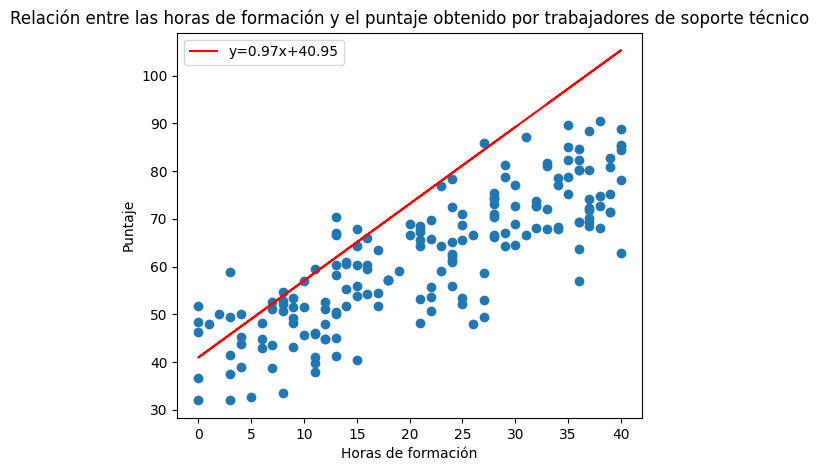

In [ ]:
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep, v_dep_sop)

# Línea de tendencia
ax.plot(v_indep, pendiente * v_indep + intercepto_sop, color='red',
        label= f'y={pendiente_sop:.2f}x+{intercepto_sop:.2f}')

#Personalización
ax.set_title('Relación entre las horas de formación y el puntaje obtenido por trabajadores de soporte técnico')
ax.set_xlabel('Horas de formación')
ax.set_ylabel('Puntaje')

ax.legend()
plt.show()

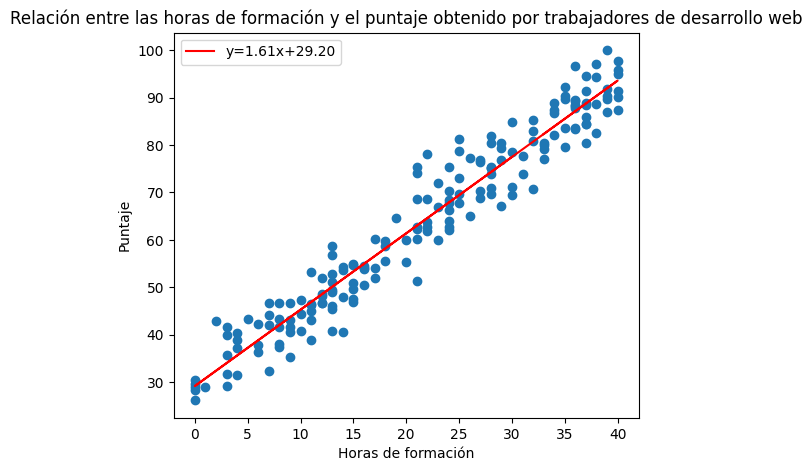

In [ ]:
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep, v_dep_des)

# Línea de tendencia
ax.plot(v_indep, pendiente_des * v_indep + intercepto_des, color='red',
        label= f'y={pendiente_des:.2f}x+{intercepto_des:.2f}')

#Personalización
ax.set_title('Relación entre las horas de formación y el puntaje obtenido por trabajadores de desarrollo web')
ax.set_xlabel('Horas de formación')
ax.set_ylabel('Puntaje')

ax.legend()
plt.show()

5. ¿En cuál de las dos áreas (Soporte Técnico o Desarrollo Web) la correlación entre el tiempo de formación y el puntaje es más fuerte? Justifica realizando el cálculo apropiado.

6. ¿En cuál de las dos áreas el modelo de regresión describe mejor la relación entre el tiempo de formación y el puntaje? Justifica tu respuesta.